In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

In [2]:
datalocation=r'C:\Users\KIIT\Videos\Face_Mask_Detection\dataset'

In [3]:
imagelocation=list(paths.list_images(datalocation))
imagelocation

['C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0136.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0004.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0020.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0025.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0027.jpg',
 'C:\

In [4]:
images=[]
category=[]
for a in imagelocation:
    label=a.split(os.path.sep)[-2]
    category.append(label)
    image=load_img(a,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    images.append(image)

C:\Users\KIIT\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
images

[array([[[  7.,   3.,  18.],
         [  7.,   3.,  18.],
         [  7.,   3.,  18.],
         ...,
         [ 19.,  12.,  28.],
         [ 19.,  12.,  28.],
         [ 20.,  13.,  29.]],
 
        [[ 11.,   7.,  22.],
         [ 11.,   7.,  22.],
         [ 11.,   7.,  22.],
         ...,
         [ 30.,  26.,  41.],
         [ 30.,  26.,  41.],
         [ 31.,  27.,  42.]],
 
        [[ 10.,   5.,  25.],
         [ 10.,   5.,  25.],
         [ 10.,   5.,  25.],
         ...,
         [ 15.,  13.,  27.],
         [ 17.,  15.,  29.],
         [ 18.,  16.,  30.]],
 
        ...,
 
        [[176.,   5.,  81.],
         [177.,   5.,  77.],
         [176.,   5.,  73.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[165.,   6.,  73.],
         [162.,   3.,  67.],
         [159.,   4.,  62.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[160.,   7.,  71.],
 

In [6]:
category

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [7]:
images=np.array(images,dtype='float32')
category=np.array(category)

In [8]:
images.shape

(3833, 224, 224, 3)

In [9]:
category

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [10]:
lb=LabelBinarizer()
category=lb.fit_transform(category)
category=to_categorical(category)

In [11]:
category

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(images,category,test_size=0.30,stratify=category,random_state=10)

In [13]:
train_X.shape

(2683, 224, 224, 3)

In [14]:
test_X.shape

(1150, 224, 224, 3)

In [15]:
train_Y.shape

(2683, 2)

In [16]:
test_Y.shape

(1150, 2)

In [17]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True)

In [18]:
import tensorflow as tf

In [19]:
baseModel=tf.keras.applications.MobileNetV3Small(
    input_shape=(224,224,3),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [20]:
baseModel.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [21]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(1228,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='Softmax')(headModel)
model=Model(inputs=baseModel.input,outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [22]:
learning_rate=0.0001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(
    
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


model.save(r'C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v3_small.model')

C:\Users\KIIT\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
223/223 [==============================] - 314s 1s/step - loss: 0.2091 - accuracy: 0.9109 - val_loss: 0.2024 - val_accuracy: 0.9174
Epoch 2/20
223/223 [==============================] - 227s 1s/step - loss: 0.0676 - accuracy: 0.9742
Epoch 3/20
223/223 [==============================] - 356s 2s/step - loss: 0.0432 - accuracy: 0.9869
Epoch 4/20
223/223 [==============================] - 213s 949ms/step - loss: 0.0291 - accuracy: 0.9891
Epoch 5/20
223/223 [==============================] - 208s 935ms/step - loss: 0.0281 - accuracy: 0.9906
Epoch 6/20
223/223 [==============================] - 262s 1s/step - loss: 0.0167 - accuracy: 0.9933
Epoch 7/20
223/223 [==============================] - 159s 711ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 8/20
223/223 [==============================] - 233s 1s/step - loss: 0.0102 - accuracy: 0.9963
Epoch 9/20
223/223 [==============================] - 303s 1s/step - loss: 0.0119 - accuracy: 0.9970
Epoch 10/20
223/223 [===================

INFO:tensorflow:Assets written to: C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v3_small.model\assets


INFO:tensorflow:Assets written to: C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v3_small.model\assets


In [23]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print("CLASSIFICATION REPORT :\n")
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

CLASSIFICATION REPORT :

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       575
without_mask       1.00      1.00      1.00       575

    accuracy                           1.00      1150
   macro avg       1.00      1.00      1.00      1150
weighted avg       1.00      1.00      1.00      1150



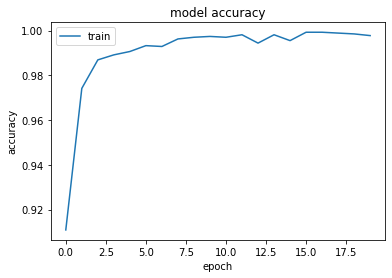

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

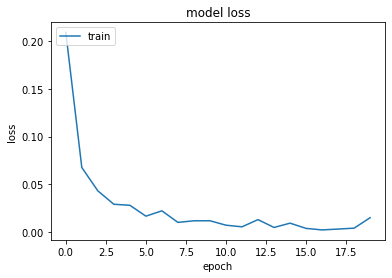

In [25]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


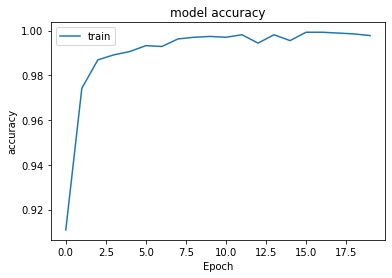

In [35]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()


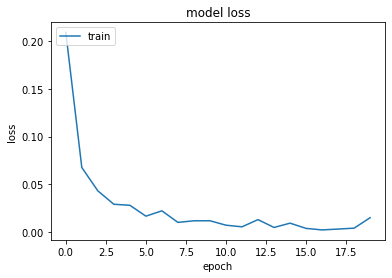

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

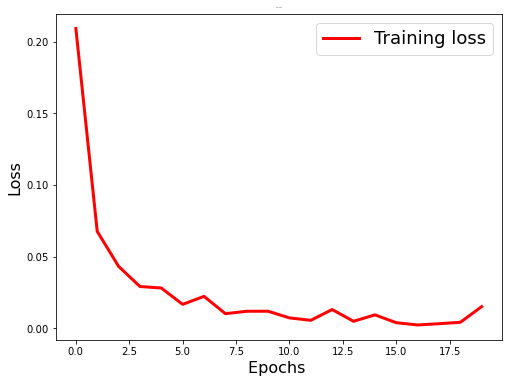

In [34]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=1)
plt.show()